<a href="https://colab.research.google.com/github/lucaspn017/sales_time_series/blob/main/Sales_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> First step </h1>
   I have to verify the data and making the necessaries modifications.

In [3]:
order = pd.read_csv(sorted(glob('drive/MyDrive/Pizza_Place_Sales/*'))[2])

# The data has three columns: Order, date and time.
# There´s no exists a dataframe column, but a date and time columns separated.

order['Datetime'] = pd.DataFrame(order["date"] + ' ' + order["time"])
order.set_index('Datetime', inplace=True)
order = order.drop(['date', 'time'], axis=1)

# No null values.
#(order['order_id'] == 0).sum()

# Save the new archive
order.to_csv('orders.csv')

In [ ]:
#order.plot()
#plt.ylabel("order")
#plt.show()

order.index = pd.to_datetime(order.index)

week = order.resample("W").sum()
week.plot(style= [":"])
plt.ylabel("Week Analysis")
plt.show()


<h1>Digging the data </h1>

We will see a couple of insights in these datas.

In [ ]:
# If we want to perform a more precise analysis, it is necessary to use D and specify the days,
# as an argument in the "scrolling" object.

daily = order.resample("D").sum()
daily.rolling(1, center = True).sum().plot()
plt.show()

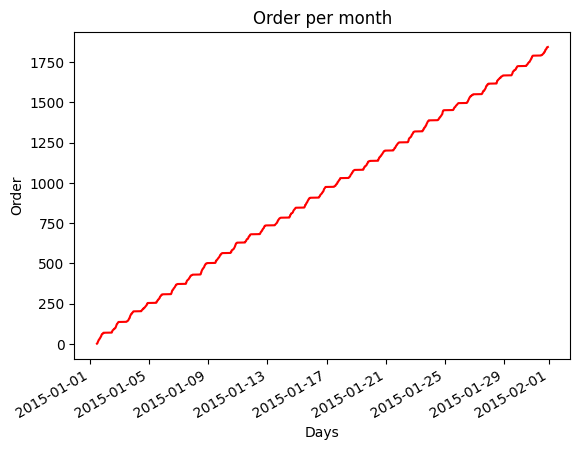

In [9]:
# Month shape

orderJan = order[order.index.month==1]
orderJan['order_id'].plot(kind='line', color='red', label='orders')
plt.title('Order per month')
plt.xlabel('Days')
plt.ylabel('Order')

plt.show()

# All the datas have the same shape.